In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
#%matplotlib qt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

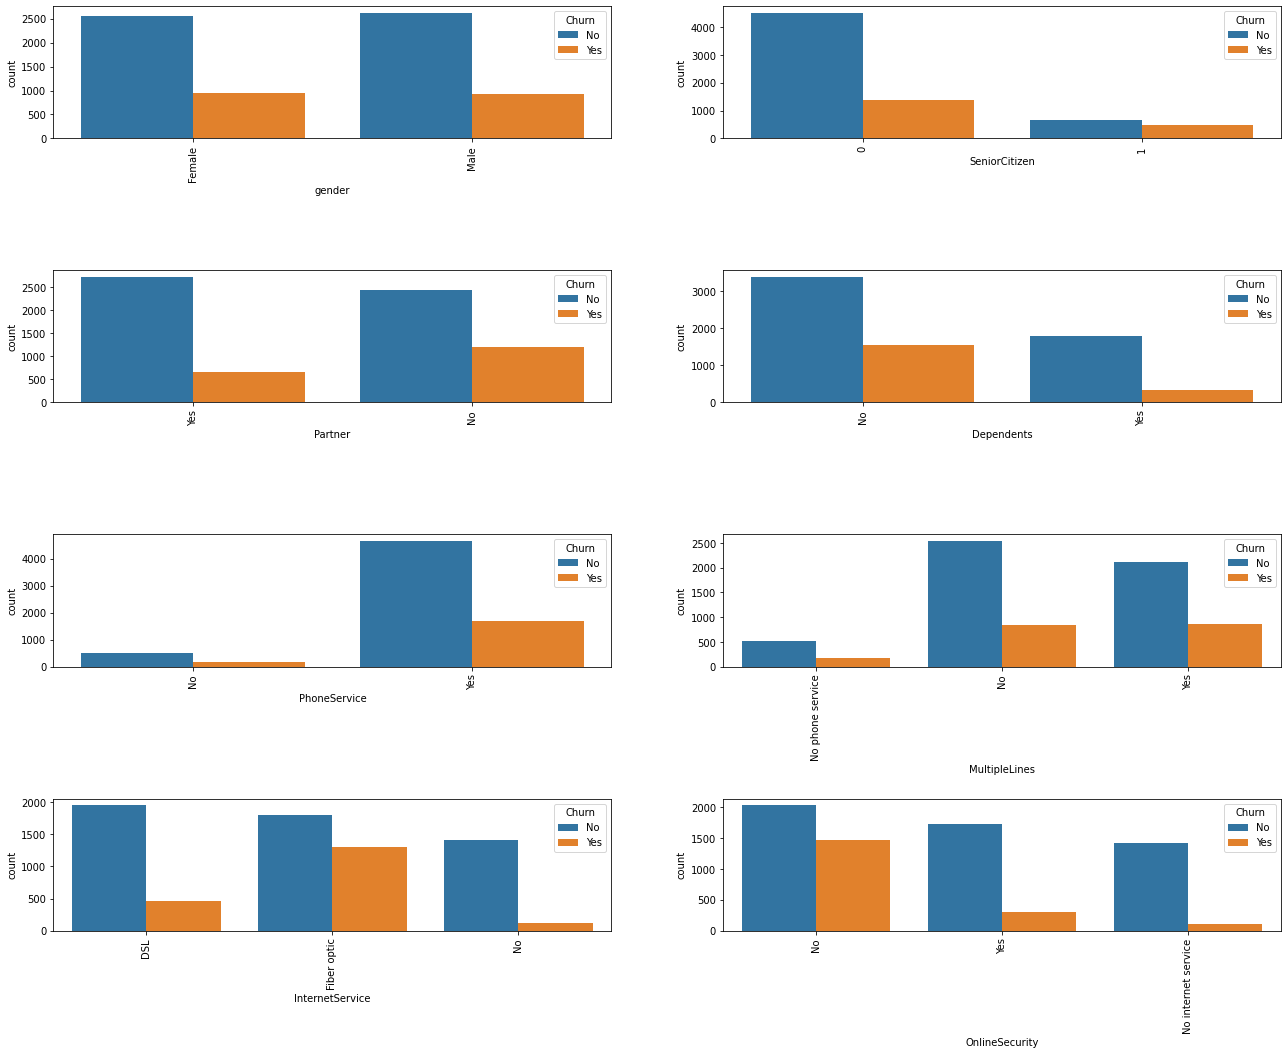

In [ ]:
feature_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
fig=plt.subplots(figsize=(22,17))
for i, j in enumerate(feature_1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Churn')
    plt.xticks(rotation=90)
   # plt.savefig('churn1.png')


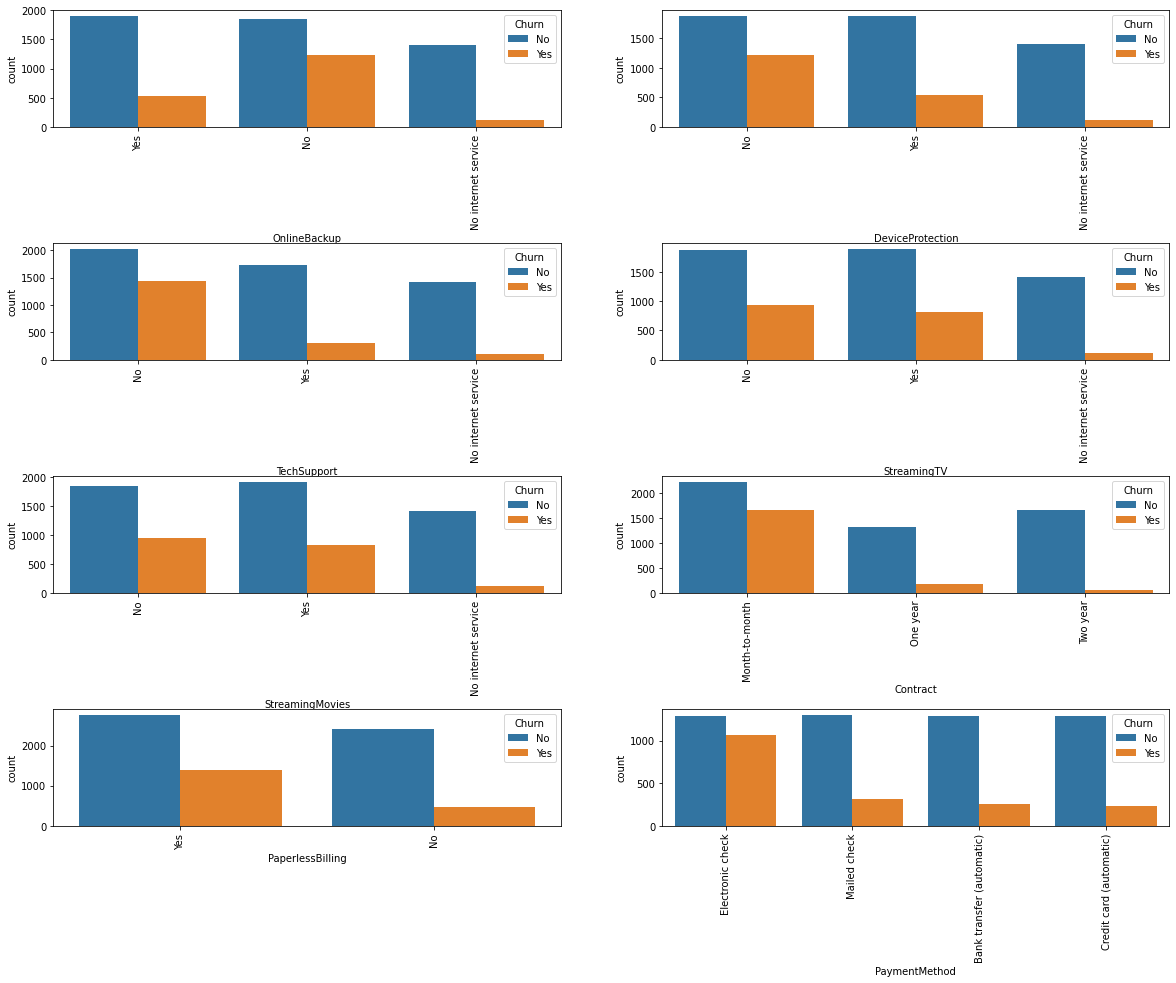

In [ ]:
#%matplotlib qt

feature_2 = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
fig=plt.subplots(figsize=(20,15))
for a, b in enumerate(feature_2):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=b,data = df, hue='Churn')
    plt.xticks(rotation=90)
   # plt.savefig('churn2.png')

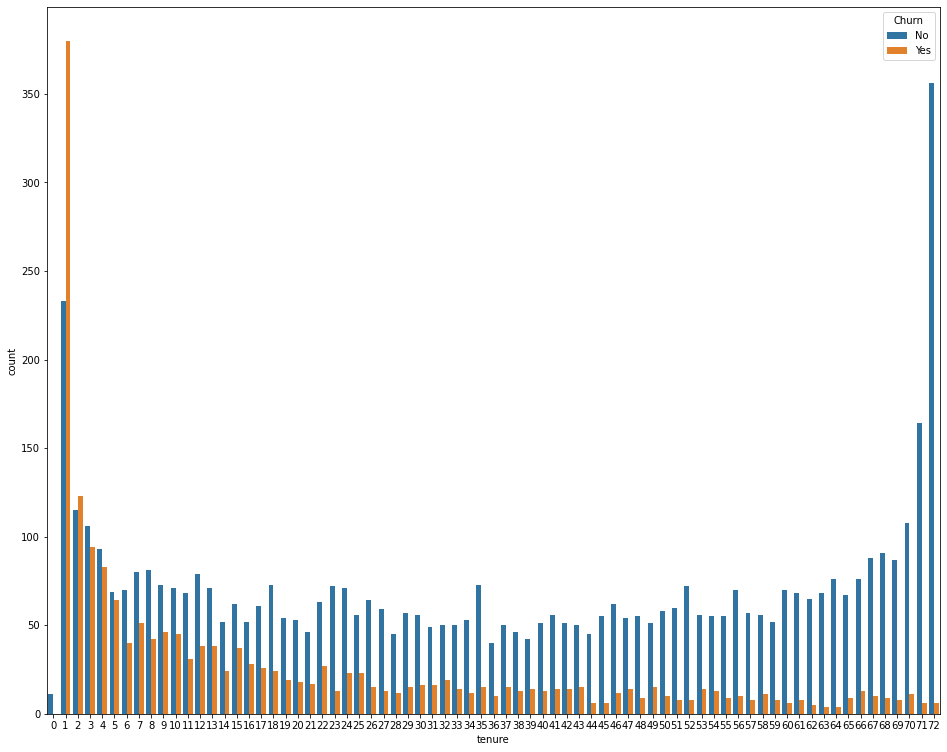

In [ ]:
#%matplotlib qt
plt.figure(figsize=(16,13))
sns.countplot(x='tenure',data = df, hue='Churn')
plt.show()

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [ ]:
def FunLabelEncoder(df):
    for c in df:
        if df.dtypes[c] == object :
            df[c]=le.fit_transform(df[c].astype(str))
    return df

In [ ]:
df_lab = FunLabelEncoder(df)
df_lab.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
df_lab

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


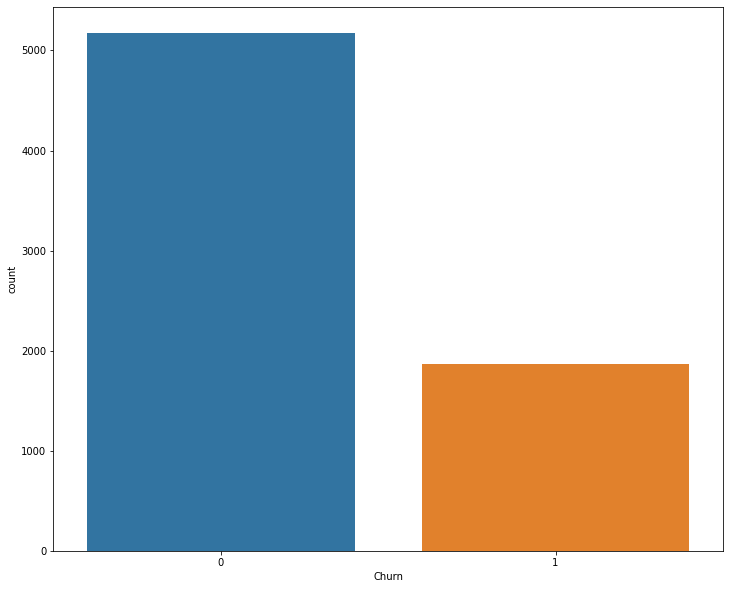

In [ ]:
plt.figure(figsize=[12, 10])
sns.countplot(x='Churn',data=df)
#plt.savefig('churn3.png')

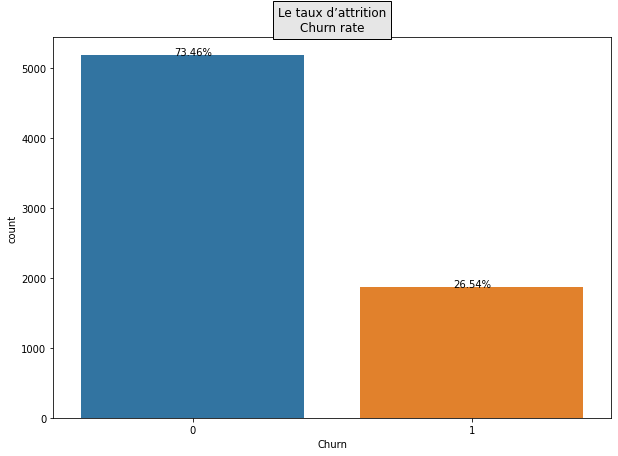

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="Churn", data=df) # for Seaborn version 0.7 and more
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 

plt.title('Le taux d’attrition\n'+'Churn rate',bbox={'facecolor':'0.9', 'pad':5})
plt.show()
#plt.savefig('churn5.png')

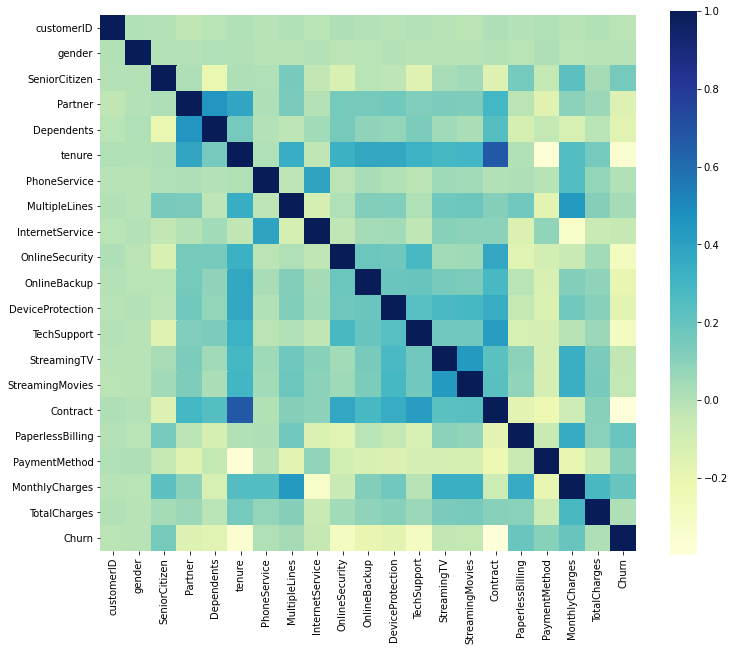

In [ ]:
#%matplotlib qt
cor = df_lab.corr()
plt.figure(figsize=[12, 10])
sns.heatmap(cor,square=True, cmap="YlGnBu")
#plt.savefig('churn4.png')

In [ ]:
from sklearn.model_selection import train_test_split
X = df_lab.iloc[:,1:-1]
y = df_lab.iloc[:,-1]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
y_test.shape,y_train.shape

((1409,), (5634,))

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 48kB/s 


In [ ]:
pip install xgboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
accu=dict()
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accu[name.replace(' :','')]=[round(accuracy_score(y_test, predictions),4)]
    print(name, accuracy_score(y_test, predictions))
    #plt.savefig('churn4.png')

DecisionTree : 0.7416607523066004
RandomForest : 0.8034066713981547
Naive Bayes : 0.7636621717530163
KNeighbours : 0.7537260468417317
SVM : 0.7530163236337828
Neural Network : 0.7175301632363378
LogisticRegression : 0.801277501774308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ExtraTreesClassifier : 0.7835344215755855
AdaBoostClassifier : 0.8097941802696949
GradientBoostingClassifier:  0.8161816891412349
XGB : 0.8140525195173882
CatBoost : 0.8062455642299503


In [ ]:
accu

{'AdaBoostClassifier': [0.8098],
 'CatBoost': [0.8062],
 'DecisionTree': [0.7417],
 'ExtraTreesClassifier': [0.7835],
 'GradientBoostingClassifier: ': [0.8162],
 'KNeighbours': [0.7537],
 'LogisticRegression': [0.8013],
 'Naive Bayes': [0.7637],
 'Neural Network': [0.7175],
 'RandomForest': [0.8034],
 'SVM': [0.753],
 'XGB': [0.8141]}

In [ ]:
for k in sorted(accu, key=accu.get, reverse=True):
    print(k, accu[k])

GradientBoostingClassifier:  [0.8162]
XGB [0.8141]
AdaBoostClassifier [0.8098]
CatBoost [0.8062]
RandomForest [0.8034]
LogisticRegression [0.8013]
ExtraTreesClassifier [0.7835]
Naive Bayes [0.7637]
KNeighbours [0.7537]
SVM [0.753]
DecisionTree [0.7417]
Neural Network [0.7175]


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = XGBClassifier()
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier()
clf4 = CatBoostClassifier(logging_level='Silent')
eclf1 = VotingClassifier(estimators=[('xgb', clf1), ('abc', clf2), ('gbc', clf3),('cbc',clf4)],
                         voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('='*63)
print('La précision de la prediction est de Model ',accuracy_score(y_test, predictions))
print('Le F1 score de Model ',f1_score(y_test, predictions))  # f1_score
print('='*63)

La précision de la prediction est de Model  0.8147622427253371
Le F1 score de Model  0.6027397260273972


In [ ]:
print('='*70)
print('Le Score de précision de la classification est de ',accuracy_score(y_test, predictions))
print('Le ratio du nombre d\'elements pertinents de Model ',recall_score(y_test, predictions))
print('Moyenne harmonique de la Précision et du Rappel  ',f1_score(y_test, predictions))  # f1_score recall_score

print('='*70)

Le Score de précision de la classification est de  0.8147622427253371
Le ratio du nombre d'elements pertinents de Model  0.5689655172413793
Moyenne harmonique de la Précision et du Rappel   0.6027397260273972


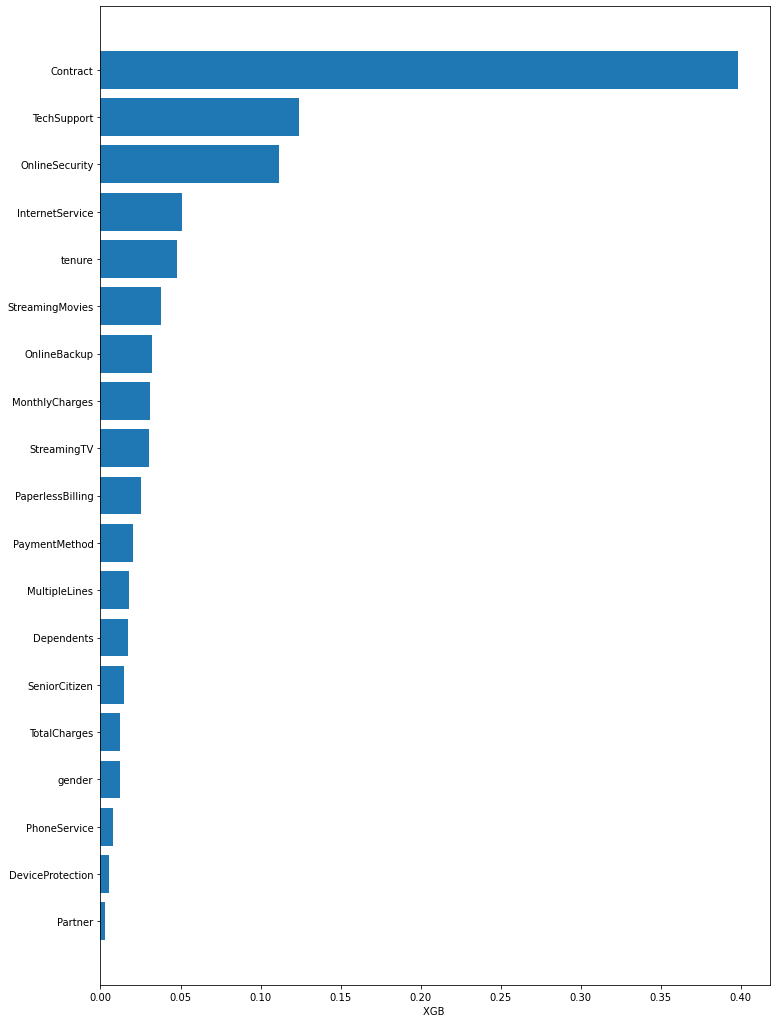

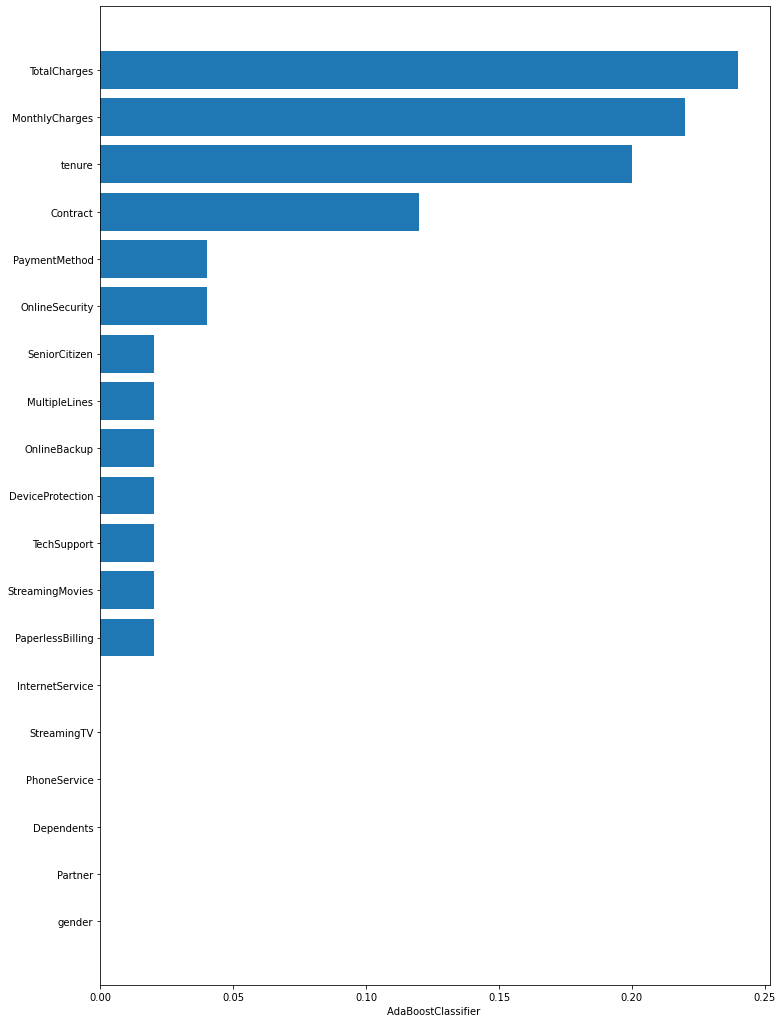

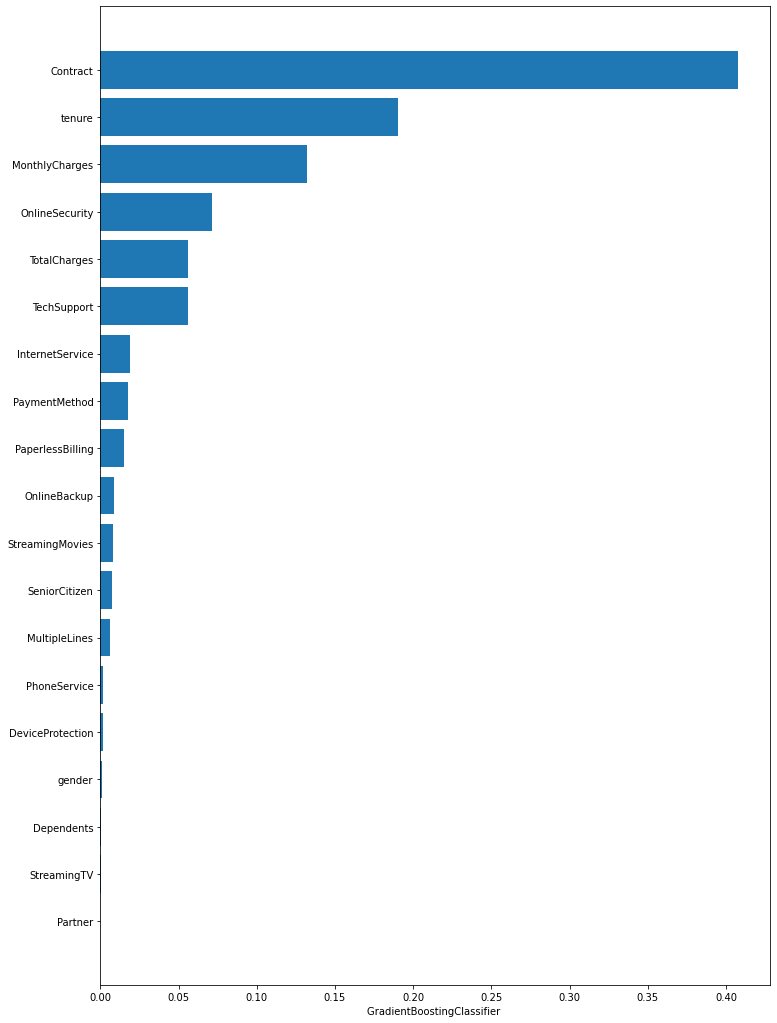

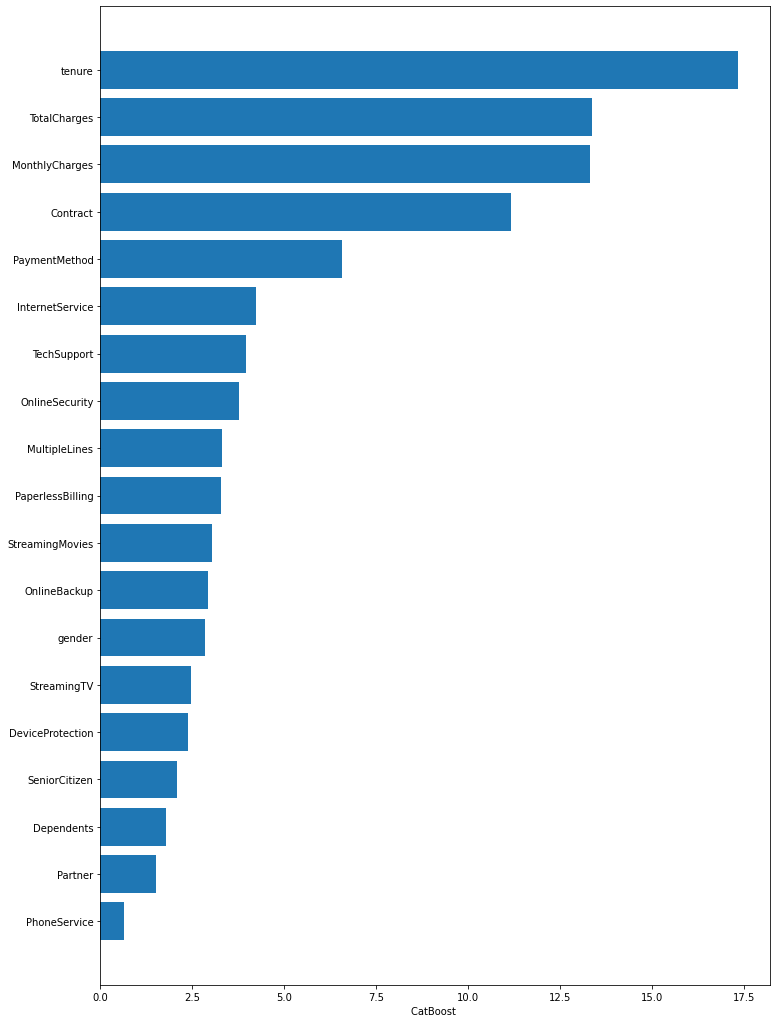

In [ ]:

classifiers = [['XGB :', XGBClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
feat_impo = {}
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    fig=plt.subplots(figsize=(12,18))
    sorted_idx = classifier.feature_importances_.argsort()
    feature_names = X_train.columns
    feat_impo[name]= feature_names[sorted_idx]
    plt.barh(feature_names[sorted_idx], classifier.feature_importances_[sorted_idx])
    plt.xlabel(name.replace(':',''))
    #plt.savefig('Feature Importances fro'+name.replace(':','')+'.png')

In [ ]:
table = pd.DataFrame(feat_impo)
table

,XGB :,AdaBoostClassifier :,GradientBoostingClassifier:,CatBoost :
0,Partner,gender,Partner,PhoneService
1,DeviceProtection,Partner,StreamingTV,Partner
2,PhoneService,Dependents,Dependents,Dependents
3,gender,PhoneService,gender,SeniorCitizen
4,TotalCharges,StreamingTV,DeviceProtection,DeviceProtection
5,SeniorCitizen,InternetService,PhoneService,StreamingTV
6,Dependents,PaperlessBilling,MultipleLines,gender
7,MultipleLines,StreamingMovies,SeniorCitizen,OnlineBackup
8,PaymentMethod,TechSupport,StreamingMovies,StreamingMovies
9,PaperlessBilling,DeviceProtection,OnlineBackup,PaperlessBilling


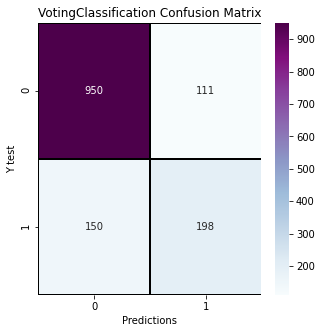

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
eclf1_cm = confusion_matrix(y_test,predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(eclf1_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('VotingClassification Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Y test')
plt.show()
#plt.savefig('Confusion matrix.png')

In [ ]:
eclf1_cm = classification_report(y_test,predictions)
print(eclf1_cm)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.64      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
y_test[y_test==0].count(), y_test[y_test==1].count()

(1061, 348)

In [ ]:
####################################################################################################################
clf3= GradientBoostingClassifier()
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print('='*70)
print('Le Score de précision de la classification est de ',accuracy_score(y_test, predictions))
print('Le ratio du nombre d\'elements pertinents de Model ',recall_score(y_test, predictions))
print('Moyenne harmonique de la Précision et du Rappel  ',f1_score(y_test, predictions))  # f1_score recall_score
print('='*70)
###################################################################################################################

Le Score de précision de la classification est de  0.8147622427253371
Le ratio du nombre d'elements pertinents de Model  0.5689655172413793
Moyenne harmonique de la Précision et du Rappel   0.6027397260273972


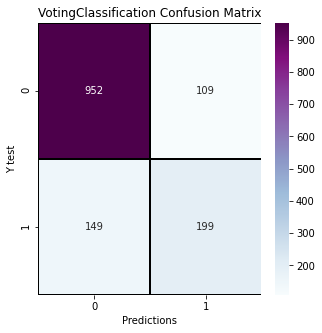

In [ ]:
clf3_cm= confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(clf3_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('VotingClassification Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Y test')
plt.show()

Text(0.5, 0, 'GradientBoostingClassifier Feature Importance')

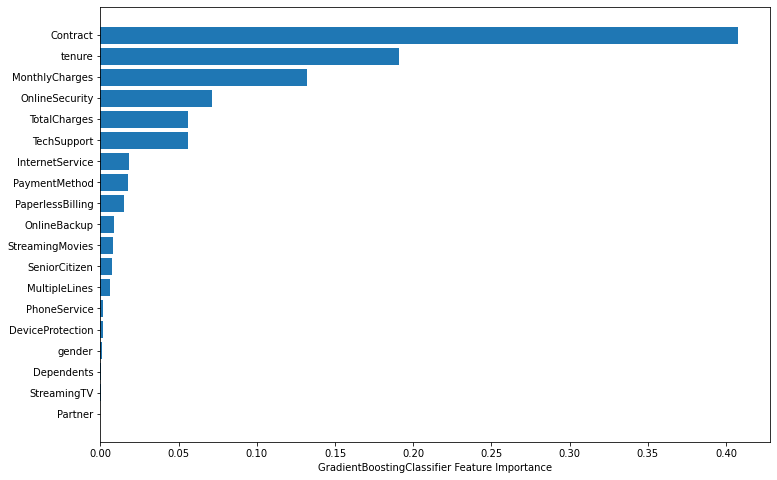

In [ ]:
plt.figure(figsize=(12,8))
sorted_idx = clf3.feature_importances_.argsort()
feature_names = X_train.columns
plt.barh(feature_names[sorted_idx], clf3.feature_importances_[sorted_idx])
plt.xlabel("GradientBoostingClassifier Feature Importance")

In [ ]:
nX = X[['Contract','tenure','MonthlyCharges', 'OnlineSecurity','TotalCharges','TechSupport',
        'InternetService','PaymentMethod','PaperlessBilling','OnlineBackup','StreamingMovies',
                         'SeniorCitizen','MultipleLines']]
nX.head()
print(nX.shape)

(7043, 13)


In [ ]:
nX_train, nX_test, y_train,y_test = train_test_split(nX,y,test_size=0.2,random_state=1)
y_test.shape,y_train.shape,nX_train.shape

((1409,), (5634,), (5634, 13))

In [ ]:
clf3.fit(nX_train, y_train)
y_pred = clf3.predict(nX_test)
print('='*70)
print('Le Score de précision de la classification est de ',accuracy_score(y_test, y_pred))
print('Le ratio du nombre d\'elements pertinents de Model ',recall_score(y_test, y_pred))
print('Moyenne harmonique de la Précision et du Rappel  ',f1_score(y_test, y_pred))  # f1_score recall_score

print('='*70)

Le Score de précision de la classification est de  0.8168914123491838
Le ratio du nombre d'elements pertinents de Model  0.5718390804597702
Moyenne harmonique de la Précision et du Rappel   0.6067073170731708


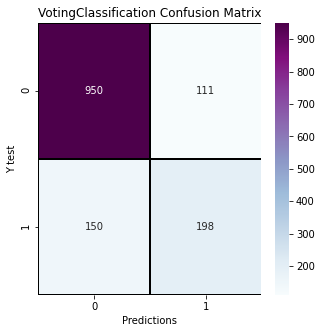

In [ ]:
ess_cm = confusion_matrix(y_test,predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(ess_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('VotingClassification Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Y test')
plt.show()

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
#outil grille de recherche
from sklearn.model_selection import GridSearchCV
#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
#Les calculs vont être conséquents en validation croisée !!!
parametres = {"learning_rate":[0.3,0.2,0.1,0.05,0.01],"max_depth":[2,3,4,5,6],"subsample":[1.0,0.8,0.5]}
#classifieur à utiliser – gradient boosting
gbc = GradientBoostingClassifier()
#instanciation de la recherche
grille = GridSearchCV(estimator=gbc,param_grid=parametres,scoring="accuracy")
#lancer l'exploration
resultats = grille.fit(nX_train,y_train)
#meilleur paramétrage : {'subsample': 0.5, 'learning_rate': 0.2, 'max_depth': 4}
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
ypredc = resultats.predict(nX_test)
#performances du ‘’meilleur’’ modèle : taux d’erreur = 0.065
err_best = 1.0 - accuracy_score(y_test,ypredc)
print(err_best)

{'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.5}
0.18807665010645847


In [ ]:
model1 = grille.best_estimator_ 

In [ ]:
model1.fit(nX_train,y_train)
y_np= model1.predict(nX_test)
print('='*70)
print('Le Score de accuaracy ',accuracy_score(y_test, y_np))
print('Le ratio du recall ',recall_score(y_test, y_np))
print('Moyenne F1 score ',f1_score(y_test, y_np))  # f1_score recall_score
print('='*70)

Le Score de accuaracy  0.8119233498935415
Le ratio du recall  0.5344827586206896
Moyenne F1 score  0.5839874411302982


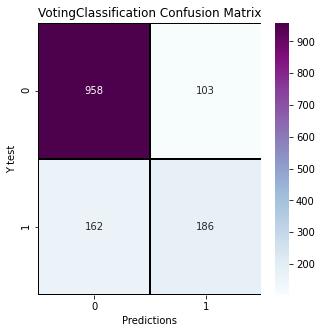

In [ ]:
model1_cm= confusion_matrix(y_test,y_np)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(model1_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('VotingClassification Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Y test')
plt.show()

1. estimator: Pass the model instance for which you want to check the hyperparameters.
2. params_grid: the dictionary object that holds the hyperparameters you want to try
3. scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4. cv: number of cross-validation you have to try for each selected set of hyperparameters
5. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6. n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors.

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


classifier = GradientBoostingClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=1000,scoring='roc_auc',cv=5,verbose=3)
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(nX_train, y_train)
timer(start_time) # timing ends here for "start_time" variable
print(random_search.score(nX_train, y_train))
print(random_search.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] subsample=0.85, n_estimators=10, min_samples_split=0.31818181818181823, min_samples_leaf=0.42727272727272736, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.15, criterion=friedman_mse 
[CV]  subsample=0.85, n_estimators=10, min_samples_split=0.31818181818181823, min_samples_leaf=0.42727272727272736, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.15, criterion=friedman_mse, score=0.500, total=   0.0s
[CV] subsample=0.85, n_estimators=10, min_samples_split=0.31818181818181823, min_samples_leaf=0.42727272727272736, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.15, criterion=friedman_mse 
[CV]  subsample=0.85, n_estimators=10, min_samples_split=0.31818181818181823, min_samples_leaf=0.42727272727272736, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.15, criterion=friedman_mse, score=0.500, total=   0.0s
[CV] subsample=0.85, n_estimators=10, min_samples_split

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[CV] subsample=1.0, n_estimators=10, min_samples_split=0.13636363636363638, min_samples_leaf=0.390909090909091, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.1, criterion=mae 
[CV]  subsample=1.0, n_estimators=10, min_samples_split=0.13636363636363638, min_samples_leaf=0.390909090909091, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.1, criterion=mae, score=0.636, total=   0.5s
[CV] subsample=1.0, n_estimators=10, min_samples_split=0.13636363636363638, min_samples_leaf=0.390909090909091, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.1, criterion=mae 
[CV]  subsample=1.0, n_estimators=10, min_samples_split=0.13636363636363638, min_samples_leaf=0.390909090909091, max_features=sqrt, max_depth=8, loss=deviance, learning_rate=0.1, criterion=mae, score=0.768, total=   0.6s
[CV] subsample=1.0, n_estimators=10, min_samples_split=0.13636363636363638, min_samples_leaf=0

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 17.8min finished


In [ ]:
'''{'subsample': 0.9, 
'n_estimators': 10, 
'min_samples_split': 0.13636363636363638, 
'min_samples_leaf': 0.1, 
'max_features': 'sqrt', 
'max_depth': 8, 
'loss': 'deviance', 
'learning_rate': 0.2, 
'criterion': 'friedman_mse'}'''

model2= GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=10, subsample=0.9, 
                                   criterion='friedman_mse', min_samples_split=0.13636363636363638,
                                   min_samples_leaf=0.1, max_depth= 8, max_features='sqrt' 
)
model2.fit(nX_train,y_train)
yy=model2.predict(nX_test)

In [ ]:
print('='*70)
print('Le Score de accuaracy ',accuracy_score(y_test, yy))
print('Le ratio du recall ',recall_score(y_test, yy))
print('Moyenne F1 score ',f1_score(y_test, yy))  # f1_score recall_score
print('='*70)

Le Score de accuaracy  0.8062455642299503
Le ratio du recall  0.41379310344827586
Moyenne F1 score  0.5133689839572193


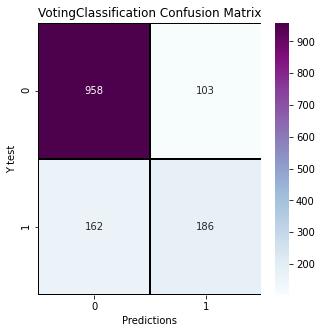

In [ ]:
model2_cm= confusion_matrix(y_test,yy)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(model1_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('VotingClassification Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Y test')
plt.show()

In [ ]:
############################################################################################################################

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [ ]:
print(gsearch1.best_params_,gsearch1.best_score_)

{'n_estimators': 50} 0.8431791289781849 0.8431791289781849


In [ ]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
        

In [ ]:
print(gsearch2.best_params_,gsearch2.best_score_)

{'max_depth': 7, 'min_samples_split': 1000} 0.8459270267072837 0.8459270267072837


In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7,
                                                               max_features='sqrt', subsample=0.8, 
                                                               random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=7,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
        

In [ ]:
print(gsearch3.best_params_,gsearch3.best_score_)

{'min_samples_leaf': 50, 'min_samples_split': 1200} 0.8457293760124903


In [ ]:
prrr = gsearch3.predict(X_test)
print('='*70)
print('Le Score de précision de la classification est de ',accuracy_score(y_test, prrr))
print('Le ratio du nombre d\'elements pertinents de Model ',recall_score(y_test, prrr))
print('Moyenne harmonique de la Précision et du Rappel  ',f1_score(y_test, prrr))  # f1_score recall_score

print('='*70)

Le Score de précision de la classification est de  0.8133427963094393
Le ratio du nombre d'elements pertinents de Model  0.5574712643678161
Moyenne harmonique de la Précision et du Rappel   0.5960061443932412


In [ ]:
param_test4 = {'max_features':["log2","sqrt"]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7, 
                                                               min_samples_split=12000, min_samples_leaf=50, 
                                                               subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.5

In [ ]:
X_train.shape,y_train.shape,X_test.shape

((5634, 19), (5634,), (1409, 19))

In [ ]:
cls = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7, 
                                                               min_samples_split=12000, min_samples_leaf=50,max_features='log2',  
                                                               subsample=0.8, random_state=10)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print('='*70)
print('Le Score de précision de la classification est de ',accuracy_score(y_test, predictions))
print('Le ratio du nombre d\'elements pertinents de Model ',recall_score(y_test, predictions))
print('Moyenne harmonique de la Précision et du Rappel  ',f1_score(y_test, predictions))  # f1_score recall_score

print('='*70)

Le Score de précision de la classification est de  0.8147622427253371
Le ratio du nombre d'elements pertinents de Model  0.5689655172413793
Moyenne harmonique de la Précision et du Rappel   0.6027397260273972


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(cls,X,y,cv=10)
score.mean() 

0.7346300773694391

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


In [ ]:
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    Y1_train,Y1_test=y.iloc[train_index],y.iloc[test_index]
    
    cls.fit(X1_train,Y1_train)
    prediction=classifier.predict(X1_test)
    socre=accuracy_score(prediction,Y1_test)
    accuracy.append(score)

In [ ]:
accuracy

[array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.73475177, 0.73579545, 0.734375  ,
        0.734375  , 0.734375  , 0.734375  , 0.734375  , 0.734375  ]),
 array([0.73475177, 0.73475177, 0.

In [ ]:
np.array(accuracy).mean()

0.7346300773694391

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf4, X, y, cv=10, scoring ='accuracy').mean())

0.799375
